In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
bank = pd.read_csv('bank-additional-full.csv', sep = ';')


In [41]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [43]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [44]:
continous = ['age','duration','campaign','pdays','previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = [ 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']

In [45]:
bank.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [46]:
bank['y'].replace({'yes':1,'no':0},inplace=True)

In [47]:
df = bank[['age','duration','campaign','pdays','previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','y']]

In [48]:
df.y = df.y.apply(int)

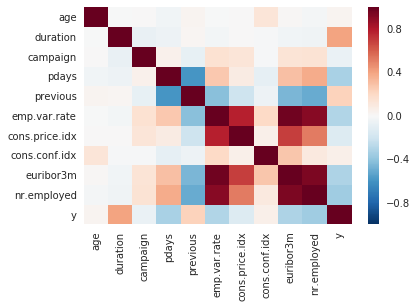

In [49]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Duration variable seems to be correlated with Y variable and hence should be dropped in the model building

In [50]:
bank.drop("duration", inplace=True, axis=1)
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

#### Lets look at some time based features

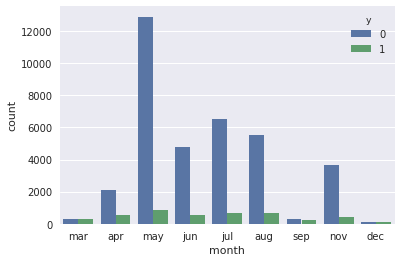

In [51]:
ax = sns.countplot(x="month", hue="y", data=bank,
                   order=["mar", "apr", "may", "jun", "jul", "aug", "sep",
                          "nov", "dec"])

plt.show()

### May , July  & Aug seems to have higher number of subsribers , obviously May does has highest contact too

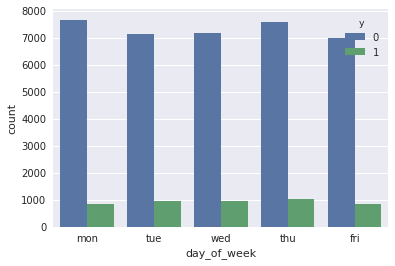

In [52]:
ax = sns.countplot(x="day_of_week", hue="y", data=bank)

plt.show()

### Lets check the distribution of customers age

Text(0.5,1,'Age Count Distribution')

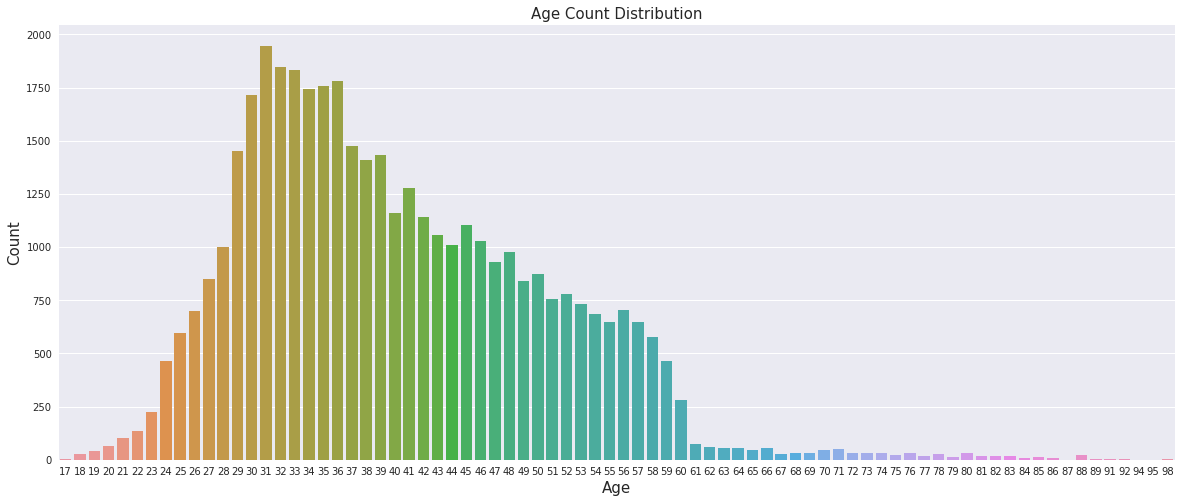

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)


### Lets treat all categorical data 

In [62]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank['contact']     = labelencoder_X.fit_transform(bank['contact']) 
bank['month']       = labelencoder_X.fit_transform(bank['month']) 
bank['day_of_week'] = labelencoder_X.fit_transform(bank['day_of_week'])
bank['job']      = labelencoder_X.fit_transform(bank['job']) 
bank['marital']  = labelencoder_X.fit_transform(bank['marital']) 
bank['education']= labelencoder_X.fit_transform(bank['education']) 
bank['default']  = labelencoder_X.fit_transform(bank['default']) 
bank['housing']  = labelencoder_X.fit_transform(bank['housing']) 
bank['loan']     = labelencoder_X.fit_transform(bank['loan']) 
bank['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [55]:
y = bank.y
del bank['y']

### Model Building

In [56]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(bank, y, test_size=0.20, random_state=42)

In [64]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,verbose = True)
## Building simple model , further parameter tuning can also be done based on cross validation
## Depth of the tree & number of trees can tuned to control overfitting
model.fit(train_X, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [68]:
model.score(test_X, test_y)

y_class = pd.DataFrame(model.predict(test_X))

### Lets adjust the prediction class probability , the objective is to capture the lower cases as much as possible

y_pred = model.predict_proba(test_X)
thresh = 0.4
0
thresh_pred = (y_pred[:, 1]>thresh).astype(int)
print(classification_report(test_y, thresh_pred, target_names=['no', 'yes']))
## Ideally the recall of the model should be highest so that we can identify all risk cases



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

          no       0.92      0.95      0.94      7303
         yes       0.49      0.39      0.44       935

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.71      0.67      0.69      8238
weighted avg       0.88      0.89      0.88      8238



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


False Positive, means the client did NOT SUBSCRIBE to term deposit, but the model predicts otherwise
False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.

Prior one is worse as our motive is to make more subscription

### We have class imbalance problem , lets do resampling to increase the accuracy

In [80]:
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [71]:
bank_final1 = pd.concat([bank, y], axis = 1)
df_majority = bank_final1[bank_final1['y'] == 0]
df_minority = bank_final1[bank_final1['y'] == 1]

In [72]:
#resampling minority datasets 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= int(4640*2),    
                                 random_state=123) 

In [74]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_new = df_upsampled['y']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_upsampled.drop('y', axis = 1), y_new, test_size = 0.2, random_state = 101)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [81]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [82]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,verbose = True)
## Building simple model , further parameter tuning can also be done based on cross validation
## Depth of the tree & number of trees can tuned to control overfitting
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [83]:
model.score(X_test, y_test)

y_class = pd.DataFrame(model.predict(X_test))

### Lets adjust the prediction class probability , the objective is to capture the lower cases as much as possible

y_pred = model.predict_proba(X_test)
thresh = 0.4
0
thresh_pred = (y_pred[:, 1]>thresh).astype(int)
print(classification_report(y_test, thresh_pred, target_names=['no', 'yes']))
## Ideally the recall of the model should be highest so that we can identify all risk cases




[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

          no       0.97      0.94      0.95      7321
         yes       0.78      0.88      0.82      1845

   micro avg       0.92      0.92      0.92      9166
   macro avg       0.87      0.91      0.89      9166
weighted avg       0.93      0.92      0.93      9166



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


### Accuracy has been boosted greatly due to oversampling of imbalanced dataset 

In [84]:
y_score = model.predict_proba(X_train)
y_score = y_score[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
sns.set(style='whitegrid', font_scale=2)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


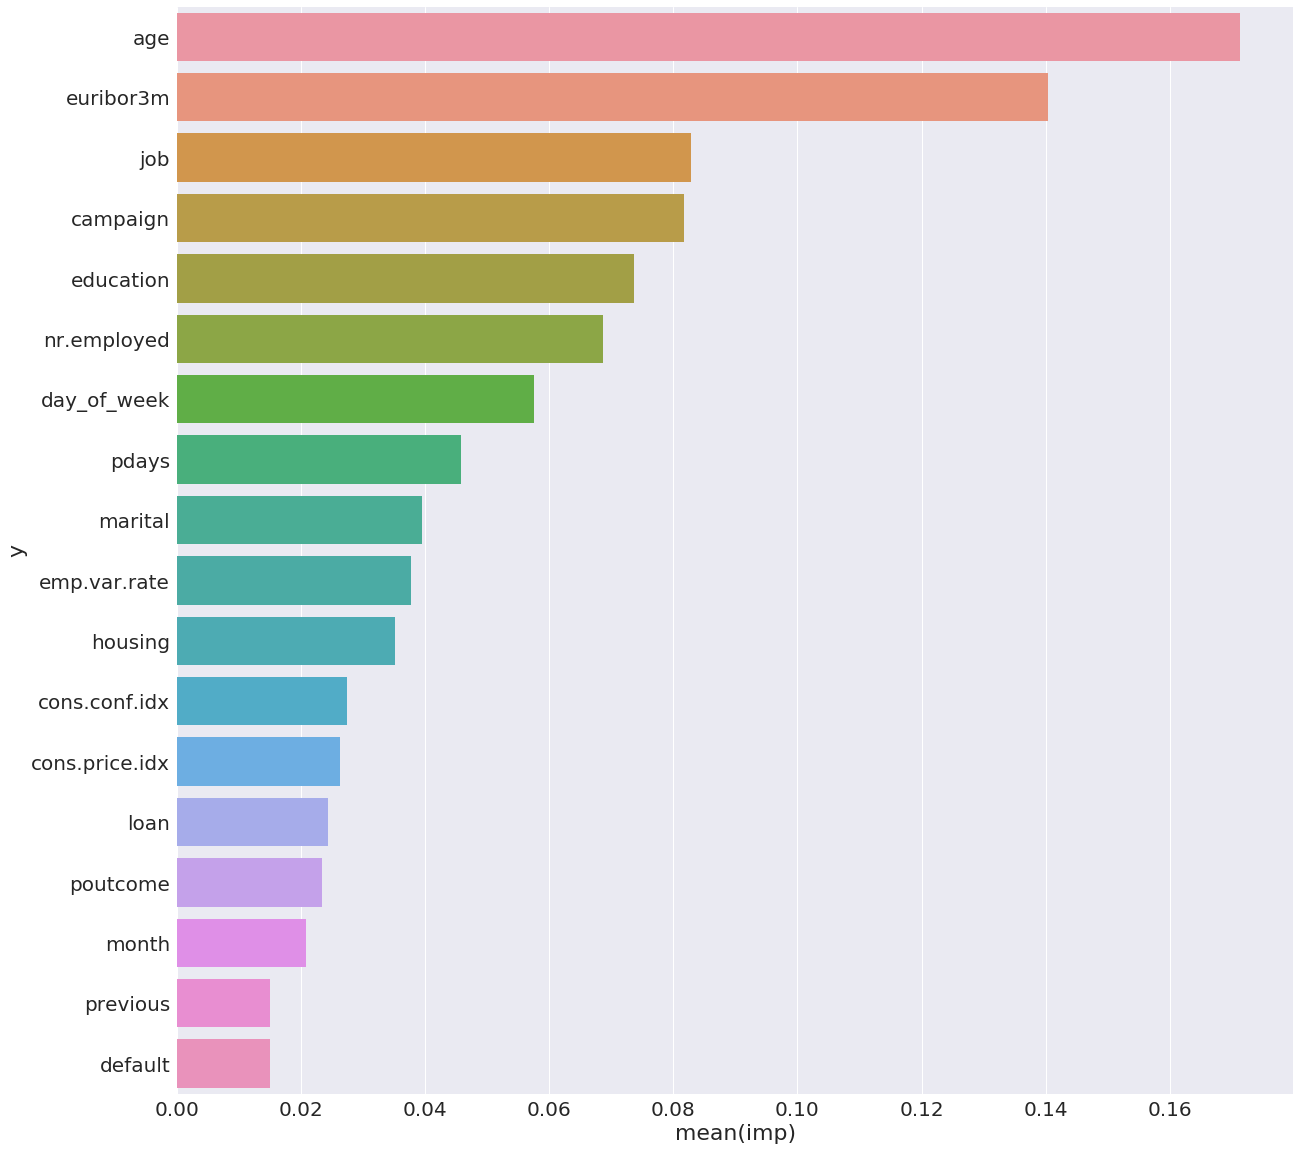

In [86]:
imp = pd.DataFrame([model.feature_importances_]).T
imp.index = pd.DataFrame(train_X).columns
imp.columns = ['imp']

imp = imp.sort_values('imp')
imp['y'] = imp.index

import seaborn as sns
sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.barplot(x='imp',y='y',data=imp.iloc[:0:-1])
# plt.savefig('importance.png', bbox_inches = 'tight')

### Roc chart to test the sensitivitty & specificity of the model

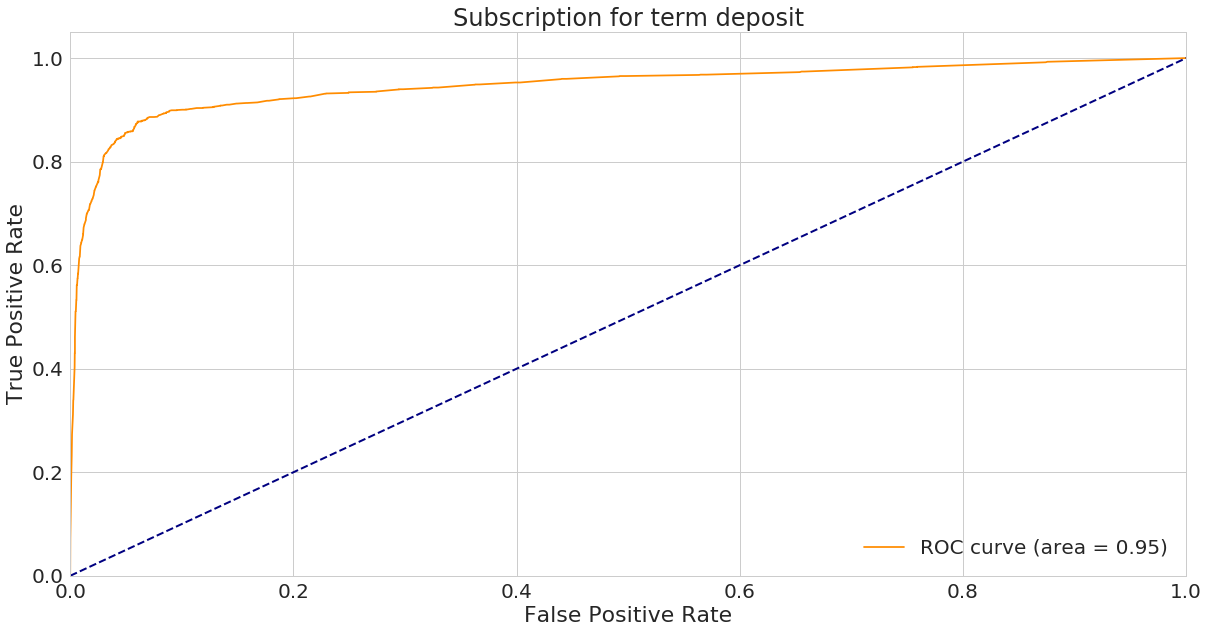

In [85]:
plt.figure(figsize=(20, 10))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Subscription for term deposity_test')
plt.legend(loc="lower right")
plt.savefig('ROC.png')
plt.show()

### Model building rationale

• Unbalanced classes are only a an issue if you also have misclassification cost imbalance. If there are small minority classes and it is not more expensive to classify them as a majority class than the other way around, then the rational thing to do is to allow misclassification of minority classes

• Handling imbalance data can be done in either cost sensitive approach or resampling as we used

• Decision trees usually give better performance than traditional linear models 

• Model accuracy can be better improved boosting algorithms like CATBOOST given that we have lot of categorical variables in the data

### Model Insights 

The most important variable for predicting the customer behaviour are:

    Age
    Daily Activity Rate
    Job
    Campaign
    Education
    Number of Employees

###  Actions Recommended

• Customers with good working background , educated & middle aged people are best suited for further campaigns

• Further the number of employees employed for the marketing also plays a role

### Intuition for evaluation metrics

• Use precision and recall to focus on small positive class — When the positive class is smaller and the ability to detect correctly positive samples is our main focus (correct detection of negatives examples is less important to the problem) we should use precision and recall

• Use ROC when both classes detection is equally important — When we want to give equal weight to both classes prediction ability we should look at the ROC curve

Further behaviour explanation can be given by SHAP

SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on expectations